<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/simpleNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 16th October, 2022
# https://www.tensorflow.org/tutorials/keras/classification77

In [1]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = load_digits()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
df = data['data']
y = data['target']
col_names = data['feature_names']

In [5]:
df.shape

(1797, 64)

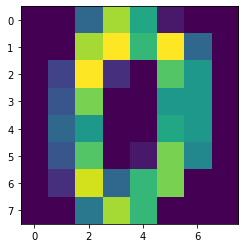

In [8]:
plt.imshow(df[0].reshape(8,8));

In [ ]:
df[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [ ]:
df = pd.DataFrame(df,columns = col_names)

In [ ]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
ss = StandardScaler()
ss.fit(df)
df = ss.transform(df)

In [ ]:
df.shape

(1797, 64)

In [ ]:
np.round(df[:10],1)

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add( tf.keras.layers.Input(shape = [64] ))

In [ ]:
model.add(tf.keras.layers.Dense(20, activation = 'relu'))

In [ ]:
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                1300      
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 1,510
Trainable params: 1,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ["accuracy"])

In [ ]:
model.fit(df,y, epochs = 50)

Epoch 1/50
57/57 [==============================] - 0s 2ms/step - loss: 1.6565e-06 - accuracy: 1.0000
Epoch 2/50
57/57 [==============================] - 0s 2ms/step - loss: 1.7078e-06 - accuracy: 1.0000
Epoch 3/50
57/57 [==============================] - 0s 2ms/step - loss: 1.6127e-06 - accuracy: 1.0000
Epoch 4/50
57/57 [==============================] - 0s 2ms/step - loss: 2.5503e-06 - accuracy: 1.0000
Epoch 5/50
57/57 [==============================] - 0s 2ms/step - loss: 1.0154e-06 - accuracy: 1.0000
Epoch 6/50
57/57 [==============================] - 0s 2ms/step - loss: 3.1658e-06 - accuracy: 1.0000
Epoch 7/50
57/57 [==============================] - 0s 2ms/step - loss: 8.9607e-07 - accuracy: 1.0000
Epoch 8/50
57/57 [==============================] - 0s 2ms/step - loss: 7.9789e-07 - accuracy: 1.0000
Epoch 9/50
57/57 [==============================] - 0s 2ms/step - loss: 9.0582e-07 - accuracy: 1.0000
Epoch 10/50
57/57 [==============================] - 0s 2ms/step - loss: 6.0638e-0

In [ ]:
model.evaluate(df,y)

57/57 [==============================] - 0s 2ms/step - loss: 2.5159e-04 - accuracy: 1.0000


[0.000251592107815668, 1.0]

In [ ]:
#fashion_mnist = tf.keras.datasets.fashion_mnist